In [1]:
import matplotlib.pyplot as plt
import numpy as np
from snsphd import viz
import json
%config InlineBackend.figure_formats = ['svg']
Colors, palette = viz.phd_style(jupyterStyle = True, grid=True)
from pydantic import BaseModel, validator, Field
from IPython.display import JSON


In [2]:
import os
import json

directory = "..//correction//diff2//"


directory2 = "..//correction//diff3//"

dBs = []
count_rates = []



for filename in os.listdir(directory):
    if filename.endswith(".json"):
        with open(os.path.join(directory, filename), "r") as f:
            data = json.load(f)
            # print(f"Loaded data from {filename}: {data}")
            # print(f"Loaded data from {filename}")
            count_rate = data["data_stats"]["count_rate"]
            dB = float(filename.split("_")[-1][:-5])
            dBs.append(dB)
            count_rates.append(count_rate)

dBs2 = []
count_rates2 = []
for filename in os.listdir(directory2):
    if filename.endswith(".json"):
        with open(os.path.join(directory2, filename), "r") as f:
            data = json.load(f)
            # print(f"Loaded data from {filename}: {data}")
            # print(f"Loaded data from {filename}")
            count_rate = data["data_stats"]["count_rate"]
            dB = float(filename.split("_")[-1][:-5])
            dBs2.append(dB)
            count_rates2.append(count_rate)

dBs = np.array(dBs)
count_rates = np.array(count_rates)

dBs2 = np.array(dBs2)
count_rates2 = np.array(count_rates2)



dBs_sort = np.argsort(dBs)
dBs = np.flip(dBs[dBs_sort])
count_rates = np.flip(count_rates[dBs_sort])


dBs_sort2 = np.argsort(dBs2)
dBs2 = np.flip(dBs2[dBs_sort2])
count_rates2 = np.flip(count_rates2[dBs_sort2])



In [3]:
dBs2

array([100.,  98.,  96.,  94.,  92.,  90.,  88.,  86.,  84.,  82.,  80.,
        78.,  76.,  74.,  72.,  70.,  68.,  66.,  64.,  62.,  60.,  58.,
        56.,  54.,  52.,  50.,  48.])

array([1.00000000e+00, 1.58489319e+00, 2.51188643e+00, 3.98107171e+00,
       6.30957344e+00, 1.00000000e+01, 1.58489319e+01, 2.51188643e+01,
       3.98107171e+01, 6.30957344e+01, 1.00000000e+02, 1.58489319e+02,
       2.51188643e+02, 3.98107171e+02, 6.30957344e+02, 1.00000000e+03,
       1.58489319e+03, 2.51188643e+03, 3.98107171e+03, 6.30957344e+03,
       1.00000000e+04, 1.58489319e+04, 2.51188643e+04, 3.98107171e+04,
       6.30957344e+04, 1.00000000e+05, 1.58489319e+05])

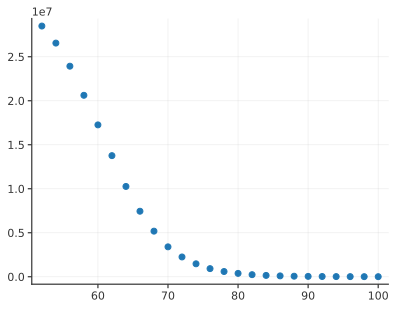

In [4]:
def db_to_power_scalar(dB):
    return 10**(dB/10)



plt.plot(dBs, count_rates, "o")


power_scalar = 1/db_to_power_scalar(dBs)
power_scalar = power_scalar/power_scalar[0]
power_scalar


power_scalar2 = 1/db_to_power_scalar(dBs2)
power_scalar2 = power_scalar2/power_scalar2[0]
power_scalar2


In [5]:
len(power_scalar)

25

In [10]:
eff_efficiencies = count_rates/(power_scalar*count_rates[0])
eff_efficiencies = eff_efficiencies/np.average(eff_efficiencies[5:9])


eff_efficiencies2 = count_rates2/(power_scalar2*count_rates2[0])
eff_efficiencies2 = eff_efficiencies2/np.average(eff_efficiencies2[8:11])

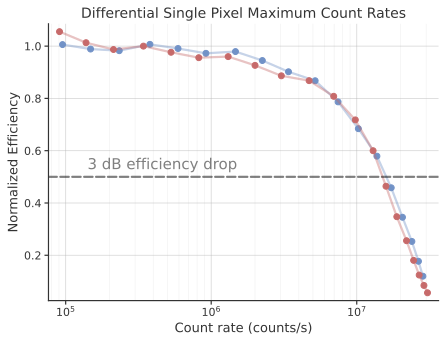

In [30]:
# plt.plot(dBs, eff_efficiencies, "o")
# ax = plt.gca()

fig, ax = plt.subplots(1,1, figsize=(7,5))
# ax.plot(dBs[5:], eff_efficiencies[5:], "o", color=Colors['blue'])
# ax.invert_xaxis()

ax.plot(count_rates[7:], eff_efficiencies[7:], "o", color=Colors['blue'])
ax.plot(count_rates[7:], eff_efficiencies[7:], color=Colors['blue'], alpha=0.4)

ax.plot(count_rates2[7:], eff_efficiencies2[7:], "o", color=Colors['red'])
ax.plot(count_rates2[7:], eff_efficiencies2[7:], color=Colors['red'], alpha=0.4)

ax.set_xscale("log")
ax.grid(True, which="minor", ls="-", alpha=0.15)
ax.grid(True, which="major", ls="-", alpha=0.5)
ax.set_xlabel("Count rate (counts/s)")
ax.set_ylabel("Normalized Efficiency")

d = {}
d["count_rates"] = count_rates.tolist()
d["eff_efficiencies"] = eff_efficiencies.tolist()
d["count_rates2"] = count_rates2.tolist()
d["eff_efficiencies2"] = eff_efficiencies2.tolist()

with open("mcr.json", 'w') as file:
    json.dump(d, file)

ax.axhline(0.5, ls="--", color="k", alpha=0.5)
ax.text(0.1, 0.49, "3 dB efficiency drop", transform=ax.transAxes, ha="left", va="center", color="k", alpha=0.5, fontsize=15)
ax.set_title("Differential Single Pixel Maximum Count Rates")
plt.savefig("mcr.png", bbox_inches="tight")


In [37]:
# Assuming eff_efficiencies, count_rates, eff_efficiencies2, and count_rates2 are numpy arrays
sorted_indices = np.argsort(eff_efficiencies)
eff_efficiencies = eff_efficiencies[sorted_indices]
count_rates = count_rates[sorted_indices]

sorted_indices2 = np.argsort(eff_efficiencies2)
eff_efficiencies2 = eff_efficiencies2[sorted_indices2]
count_rates2 = count_rates2[sorted_indices2]

# Now perform the interpolation
print(np.interp(0.5, eff_efficiencies, count_rates))
print(np.interp(0.5, eff_efficiencies2, count_rates2))

16046258.437469192
15105968.336031955


In [34]:
len(count_rates)

25

In [18]:
eff_efficiencies

array([1.21828516, 1.15555128, 1.07650767, 1.04470971, 1.04200831,
       1.017023  , 0.98837548, 1.00584737, 0.98875416, 0.98245099,
       1.00672195, 0.99082026, 0.97241045, 0.97911771, 0.9448573 ,
       0.90183759, 0.86756202, 0.78670294, 0.68419161, 0.57905521,
       0.45817182, 0.34542038, 0.25290775, 0.17707929, 0.11988058])

In [36]:
print("count rate, efficiency")
for c, e in zip(count_rates2, eff_efficiencies2):
    print(c, ",", e)

count rate, efficiency
9304.213440829793 , 2.7186610185510305
11445.921439566324 , 2.110212329649829
14408.5728580551 , 1.676086246403144
19586.505668929993 , 1.4375811120088633
27851.558342852357 , 1.289807491793969
39640.270438517015 , 1.1582758573991363
58449.96501965888 , 1.077605132127822
90721.89442682822 , 1.05532810913634
138026.05266472735 , 1.0130630222148886
213131.65235106667 , 0.9870140785547168
342208.7570068385 , 0.999922899230395
529597.909209842 , 0.976386255726145
821576.4015234069 , 0.9557038858244314
1307763.5859992376 , 0.9598527996689815
2000280.2555313131 , 0.9263310969937009
3033595.0105735804 , 0.8864066321958496
4707328.299083344 , 0.8678604224992462
6946373.847110963 , 0.8080412808551214
9779447.591595452 , 0.7177772993913629
12954704.348901378 , 0.5999332072374706
15880465.92673587 , 0.4640220685607386
18848518.416921865 , 0.34749824353614756
21979695.36829955 , 0.255680180610965
24596643.979921293 , 0.18053077665830047
26854895.682129346 , 0.124365197867088